# Decision tree predicting the categorical column of species in Penguins dataset

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("dark")

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [5]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
penguins_model = penguins.dropna()

In [7]:
penguins_train, penguins_test = train_test_split(penguins_model, test_size=0.3, stratify=penguins_model['species'], random_state=42)

In [8]:
features= ['bill_length_mm','body_mass_g']
dt_classification = DecisionTreeClassifier(max_depth = 2) # Increase max_depth to see effect in the plot
dt_classification.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=2)

In [9]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [10]:
predictionsOnTrainset = dt_classification.predict(penguins_train[features])
predictionsOnTestset = dt_classification.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9356223175965666
Accuracy on test set 0.91


The accurracy are slightly different and that was expected, as the training data is almost always higher than the test set.

In [11]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

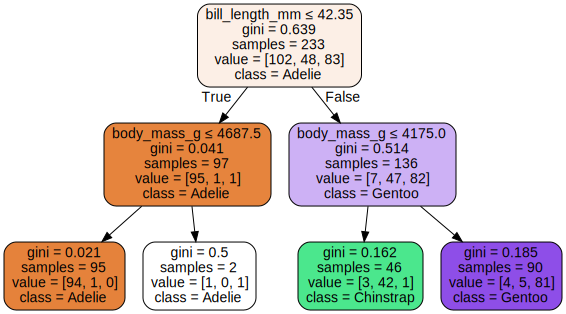

In [12]:
plot_tree_classification(dt_classification, features, penguins_model.species.unique())

Adelie penguins have small bills and are heavier
Gentoo have larger bill_length and are heavier
Chinstrap have larger bill_length and are lighter


<AxesSubplot:ylabel='Frequency'>

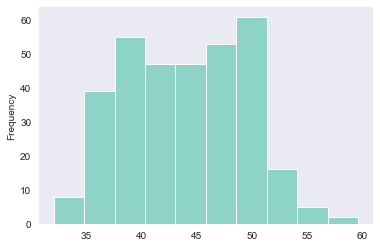

In [13]:
penguins_model['bill_length_mm'].plot(kind='hist')